# Photoshop Blend Modes with Python numpy

In [1]:
from PIL import Image
from IPython.display import display
from io import BytesIO
import urllib
import requests
import numpy as np
import matplotlib.pyplot as plt

Some utility functions we need later on

In [2]:
# Display ndarray as image using matplotlib
def display_img(img_data):
    img = Image.fromarray(img_data)
    display(img)

def convert_uint_to_float(img_data):
    return img_data / 255
    
def convert_float_to_uint(img_data):
    return round_to_uint(img_data * 255)

def round_to_uint(img_data):
    return np.round(img_data).astype('uint8')

# A utility function to convert hex string to a tuple of RGB
def hex_to_rgb(hex_string):
    return np.array(list(int(hex_string.lstrip('#')[i:i+2], 16) for i in (0, 2, 4)))

def hex_to_rgb_float(hex_string):
    return np.array(list((int(hex_string.lstrip('#')[i:i+2], 16) / 255) for i in (0, 2, 4)))

def get_array_from_hex(hex_string, height, width):
    rgb_as_float = hex_to_rgb_float(hex_string)
    return np.full((height, width, 3), rgb_as_float)

## Load and display an image file

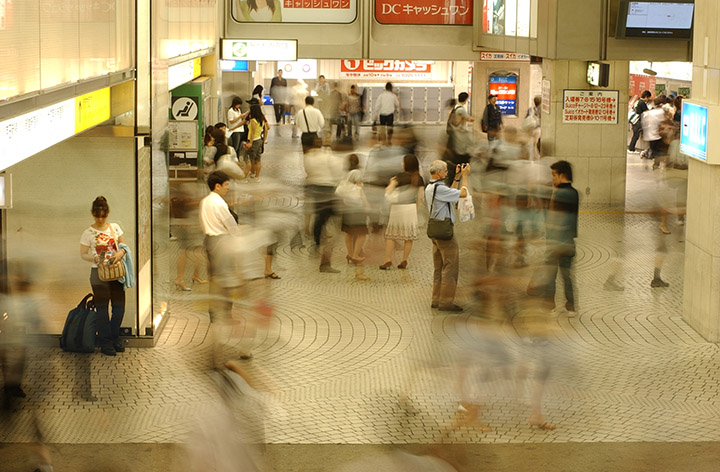

In [3]:
image01_url = "https://github.com/subwaymatch/layer-is-python/blob/master/images/image02.jpg?raw=true"
response = requests.get(image01_url)
image01 = Image.open(BytesIO(response.content))

display(image01)

## PIL to Numpy conversions

### Read an image as a Numpy ndarray

In [4]:
image01_data = np.asarray(image01)
type(image01_data)

numpy.ndarray

### Numpy array into PIL image

In [5]:
img = Image.fromarray(image01_data, 'RGB')
# display(img)

### Numpy array of unsigned int pixel values to float values (0 ~ 1)

In [6]:
image01_float_data = convert_uint_to_float(image01_data)

## Convert image to grayscale

In [7]:
image01_gray = np.dot(image01_data[...,:3], [0.2989, 0.5870, 0.1140])
image01_gray_data = np.stack((round_to_uint(image01_gray),)*3, axis=-1)

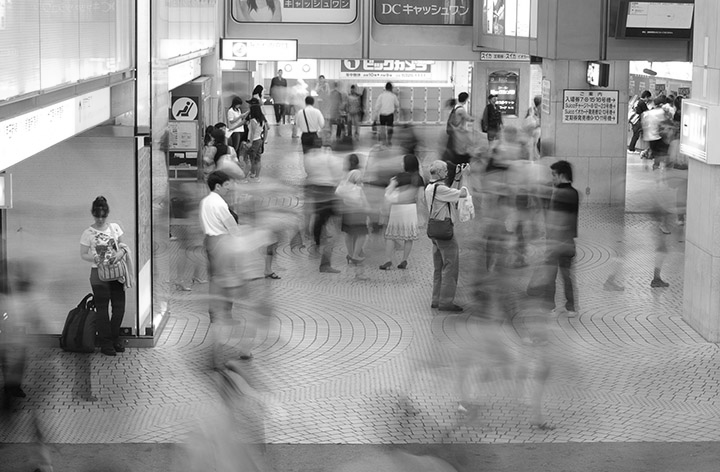

In [8]:
display_img(image01_gray_data)

## Blend Mode Operations

### Darken Operations

#### Darken

Looks at the color information in each channel and selects the base or blend color—whichever is darker—as the result color. Pixels lighter than the blend color are replaced, and pixels darker than the blend color do not change.

```
C = min(A, B)
```

In [9]:
lighten_hex = '#e6ba81'
rgb = hex_to_rgb(lighten_hex)

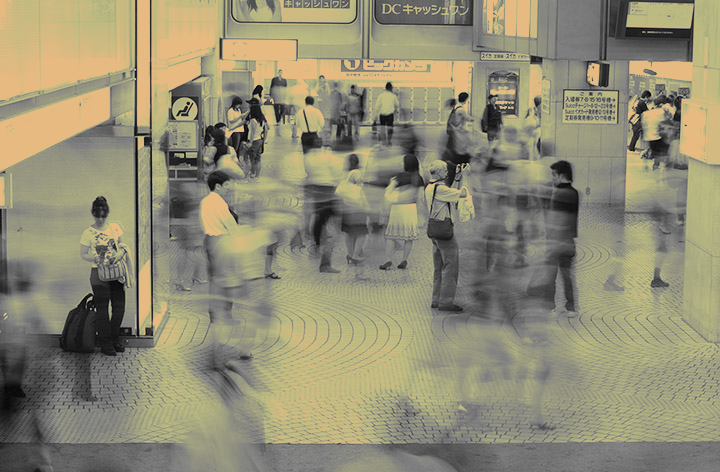

In [10]:
image01_darken = round_to_uint(np.minimum(image01_gray_data, rgb))
display_img(image01_darken)

#### Multiply

Looks at the color information in each channel and multiplies the base color by the blend color. The result color is always a darker color. Multiplying any color with black produces black. Multiplying any color with white leaves the color unchanged. When you’re painting with a color other than black or white, successive strokes with a painting tool produce progressively darker colors. The effect is similar to drawing on the image with multiple marking pens.

```
C = A * B
```

In [11]:
bright_hex = '#59ff74'
rgb_as_float = hex_to_rgb_float(bright_hex)

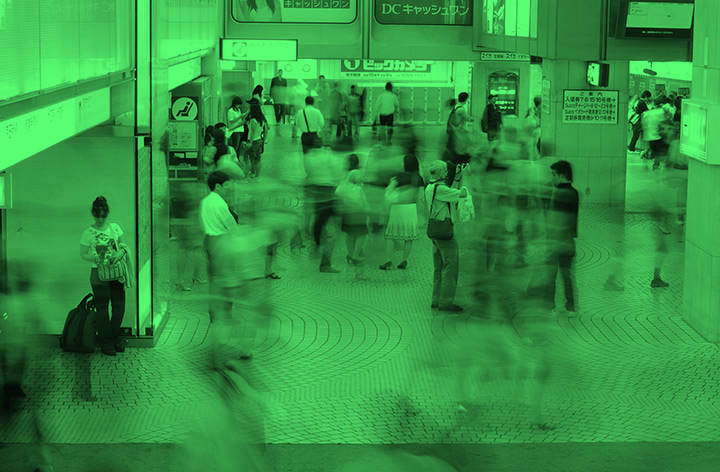

In [12]:
image01_multiply = round_to_uint(image01_gray_data * rgb_as_float)
display_img(image01_multiply)

#### Color Burn

Looks at the color information in each channel and darkens the base color to reflect the blend color by increasing the contrast between the two. Blending with white produces no change.

```
If B = 0: C = 0
Else: C = 1 - (1 - A) / B
```

In [29]:
color_burn_hex = '#b3dcff'

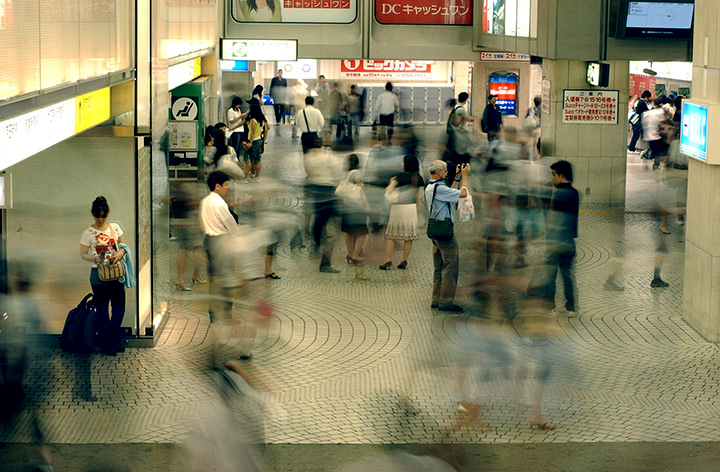

In [28]:
color_burn_color_array = get_array_from_hex(color_burn_hex, image01_data.shape[0], image01_data.shape[1])

A = image01_float_data
B = color_burn_color_array

image01_color_burn = np.clip(np.where(color_burn_color_array > 0, 1 - (1 - A) / B, 0), 0, 1)
display_img(convert_float_to_uint(image01_color_burn))

#### Linear Burn

Looks at the color information in each channel and darkens the base color to reflect the blend color by decreasing the brightness. Blending with white produces no change.

```
C = A + B - 1
```

In [34]:
linear_burn_hex = '#f8a5ff'
rgb = hex_to_rgb(linear_burn_hex)
rgb

array([248, 165, 255])

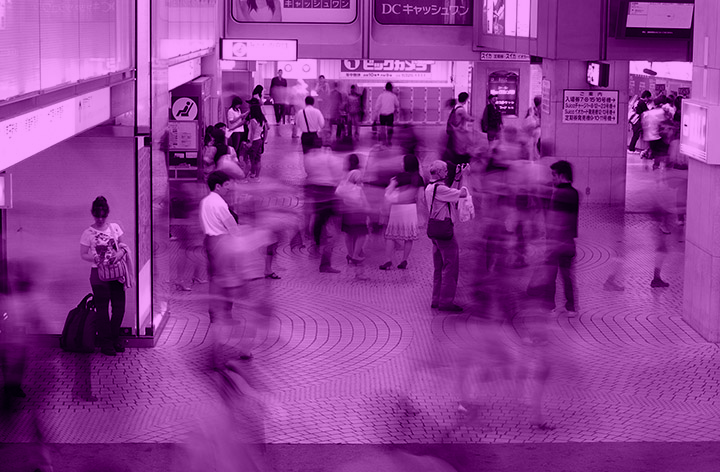

In [42]:
A = image01_gray_data
B = rgb

image01_linear_burn = np.clip(A + B - 255, 0, 255).astype('uint8')
display_img(image01_linear_burn.astype('uint8'))

### Lighten Operations

#### Lighten

```
max(A, B)
```

In [ ]:
lighten_hex = '#e6ba81'
rgb = hex_to_rgb(lighten_hex)

In [ ]:
image01_lighten = round_to_uint(np.maximum(image01_gray_data, rgb))
display_img(image01_lighten)

### Contrast Operations

A combination of multiply and screen

#### Overlay

A combination of multiply and screen

```
If A <= 0.5: (2 * A) * B
If A > 0.5: 1 - 2 * (1 - A) * (1 - B)
```

In [22]:
overlay_hex = '#9facd6'
rgb_as_float = hex_to_rgb_float(overlay_hex)

In [23]:
data01 = (2 * image01_float_data) * rgb_as_float
data02 = 1 - 2 * (1 - image01_float_data) * (1 - rgb_as_float)

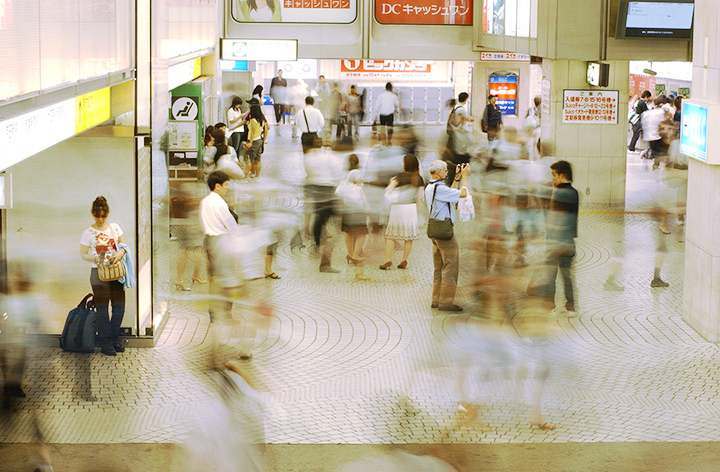

In [24]:
image01_overlay = np.where(image01_float_data <= 0.5, data01, data02)
display_img(convert_float_to_uint(image01_overlay))

#### Soft Light

This mode has nothing in common with the hard light mode (except for its name), but the result is similar to overlay mode.

```
If B <= 0.5: 2 * A * B + A^2 * (1 - 2 * B)
If B > 0.5: sqrt(A) * (2 * B - 1) + (2 * A) * (1 - B)
```

In [25]:
soft_light_hex = '#274c7f'

In [26]:
soft_light_color_array = get_array_from_hex(soft_light_hex, image01_data.shape[0], image01_data.shape[1])

a = image01_float_data
b = rgb_as_float

data01 = 2 * a * b + np.square(a) * (1 - 2 * b)
data02 = np.sqrt(a) * (2 * b - 1) + (2 * a) * (1 - b)

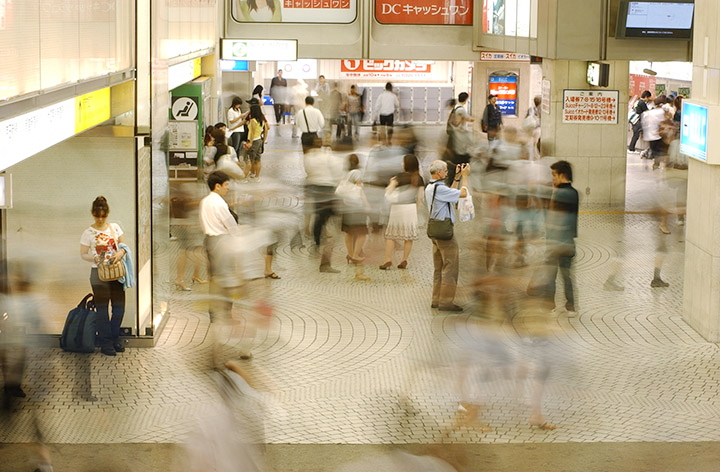

In [27]:
image01_soft_light = np.where(soft_light_color_array <= 0.5, data01, data02)
display_img(convert_float_to_uint(image01_soft_light))

#### Hard Light

This mode corresponds exactly to Overlay with the layers swapped. If the color application or the upper layer is lighter than 50% gray, the background gets lightened, otherwise darkened.

```
If (B <= 0.5): (2 * A) * B
If (B > 0.5): 1 - 2 * (1 - A) * (1 - B)
```

In [ ]:
hard_light_hex = '#931919'
rgb_as_float = hex_to_rgb_float(hard_light_hex)

In [ ]:
hard_light_color_array = get_array_from_hex(hard_light_hex, image01_data.shape[0], image01_data.shape[1])

data01 = (2 * image01_float_data) * rgb_as_float
data02 = 1 - 2 * (1 - image01_float_data) * (1 - rgb_as_float)

In [ ]:
image01_hard_light = np.where(hard_light_color_array <= 0.5, data01, data02)
display_img(convert_float_to_uint(image01_hard_light))

#### Vivid Light

